# MNIST Handwritten Digit Recognition Based on CNN

## 1 Packages

In [14]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from visualization import *
%matplotlib inline

## 2 MNIST Dataset

### 2.1 Load the MNIST Dataset

The shape of train dataset: torch.Size([60000, 28, 28])
The shape of test dataset: torch.Size([10000, 28, 28])


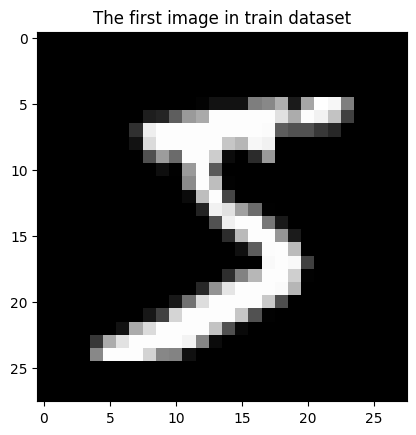

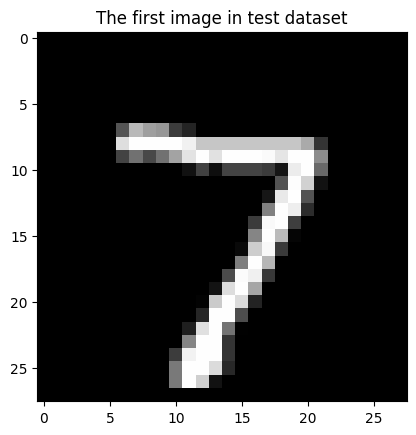

In [15]:
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = torchvision.datasets.MNIST(root='./', train=True, download=False, transform=transform)  
test_dataset = torchvision.datasets.MNIST(root='./', train=False, download=False, transform=transform)  

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

print('The shape of train dataset:', train_dataset.data.shape)
print('The shape of test dataset:', test_dataset.data.shape)

plt.imshow(train_dataset.data[0], cmap='gray')
plt.title('The first image in train dataset')
plt.show()

plt.imshow(test_dataset.data[0], cmap='gray')
plt.title('The first image in test dataset')
plt.show()

### 2.2 Visualize the MNIST Dataset

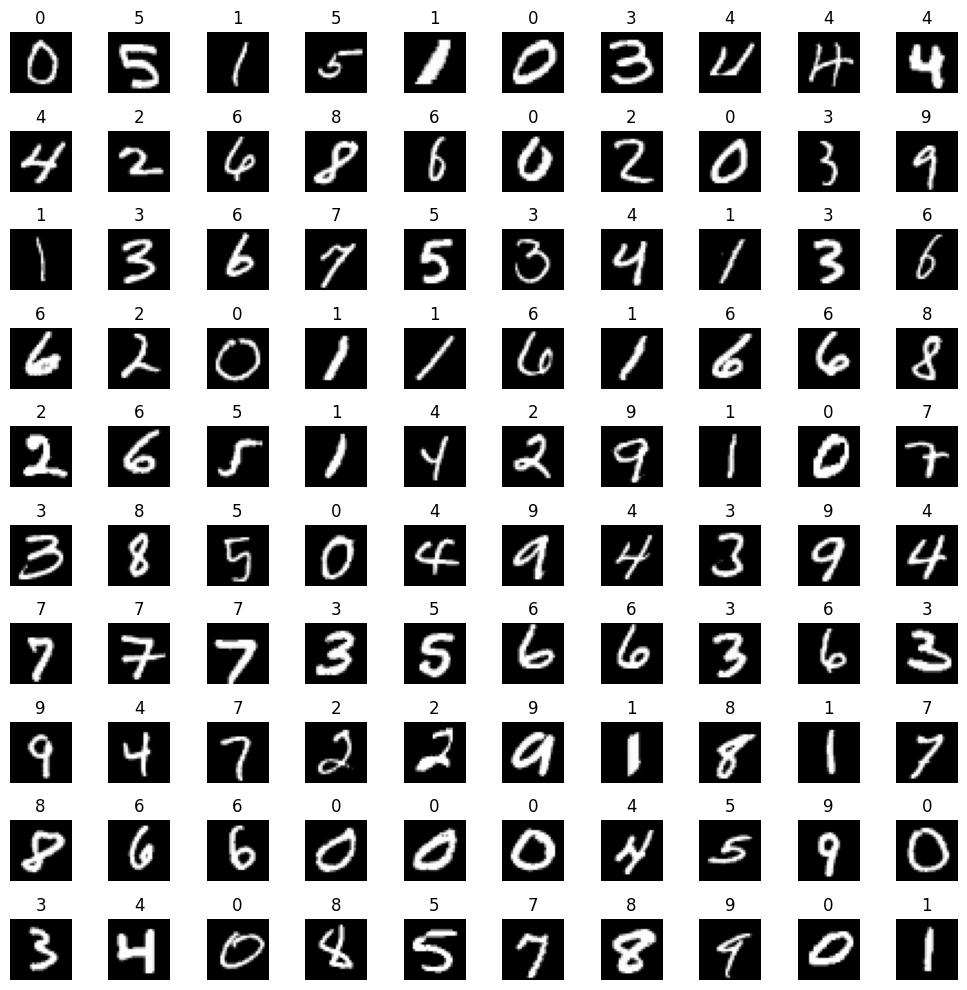

In [16]:
visualize_MNIST_dataset(train_loader)

## 3 Neural Network Model

### 3.1 Define The Neural Network Model

In [17]:
class CNNModel(torch.nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x),2))
        x = F.relu(F.max_pool2d(self.conv2(x),2))
        x = x.view(-1, 64*7*7)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model = CNNModel()

criterion = torch.nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005,weight_decay=1e-5)  

print('The parameters of the CNN model:')
for name, param in model.named_parameters():
    print(name, param.shape)
total_params = sum(p.numel() for p in model.parameters())
print('total_params', total_params)


The parameters of the CNN model:
conv1.weight torch.Size([32, 1, 3, 3])
conv1.bias torch.Size([32])
conv2.weight torch.Size([64, 32, 3, 3])
conv2.bias torch.Size([64])
fc1.weight torch.Size([128, 3136])
fc1.bias torch.Size([128])
fc2.weight torch.Size([10, 128])
fc2.bias torch.Size([10])
total_params 421642



### 3.2 Train Neural Networks Model

Epoch: 1, Batch: 100, Average Loss: 0.94572
Epoch: 1, Batch: 200, Average Loss: 0.33410
Epoch: 1, Batch: 300, Average Loss: 0.21780
Epoch: 1, Batch: 400, Average Loss: 0.19356
Epoch: 1, Batch: 500, Average Loss: 0.16163
Epoch: 1, Batch: 600, Average Loss: 0.14208
Epoch: 1, Batch: 700, Average Loss: 0.13398
Epoch: 1, Batch: 800, Average Loss: 0.12670
Epoch: 1, Batch: 900, Average Loss: 0.10785
Epoch: 1 completed. Average Loss: 0.00456
Epoch: 2, Batch: 100, Average Loss: 0.10279
Epoch: 2, Batch: 200, Average Loss: 0.10405
Epoch: 2, Batch: 300, Average Loss: 0.08373
Epoch: 2, Batch: 400, Average Loss: 0.08800
Epoch: 2, Batch: 500, Average Loss: 0.08426
Epoch: 2, Batch: 600, Average Loss: 0.08174
Epoch: 2, Batch: 700, Average Loss: 0.07793
Epoch: 2, Batch: 800, Average Loss: 0.08423
Epoch: 2, Batch: 900, Average Loss: 0.08543
Epoch: 2 completed. Average Loss: 0.00360
Epoch: 3, Batch: 100, Average Loss: 0.07112
Epoch: 3, Batch: 200, Average Loss: 0.06355
Epoch: 3, Batch: 300, Average Loss: 

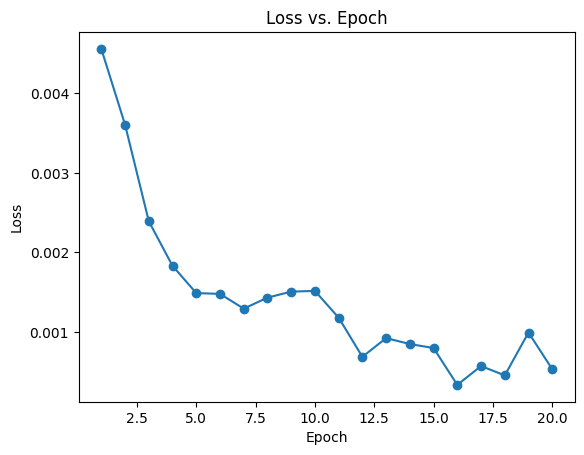

In [18]:
num_epochs = 20
epoch_losses = []
best_loss = float('inf') 
best_model_weights = None

for epoch in range(num_epochs):
    epoch_loss = 0.0
    for i,data in enumerate(train_loader,0):
        inputs,labels = data
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        if i % 100 == 99:
            avg_loss = epoch_loss / 100
            print(f"Epoch: {epoch + 1}, Batch: {i + 1}, Average Loss: {avg_loss:.5f}")
            epoch_loss = 0.0

    epoch_avg_loss = epoch_loss / len(train_loader)
    epoch_losses.append(epoch_avg_loss)
    print(f"Epoch: {epoch + 1} completed. Average Loss: {epoch_loss / len(train_loader):.5f}")

    if epoch_avg_loss < best_loss:
        best_loss = epoch_avg_loss
        best_model_weights = model.state_dict().copy() 

model.load_state_dict(best_model_weights)
print(f"The min average loss is:{best_loss:.5f}")

plt.plot(range(1, num_epochs + 1), epoch_losses, marker='o')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### 3.3 Compute Average Loss

In [19]:
correct = 0
total = 0
with torch.no_grad():  
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, dim=1) 
        total += labels.size(0)  
        correct += (predicted == labels).sum().item()
acc = correct / total
print(f'Accuracy on test set: {100*acc:.2f} %' )  


Accuracy on test set: 99.00 %


### 3.4 Visualize the prediction results of the Dataset

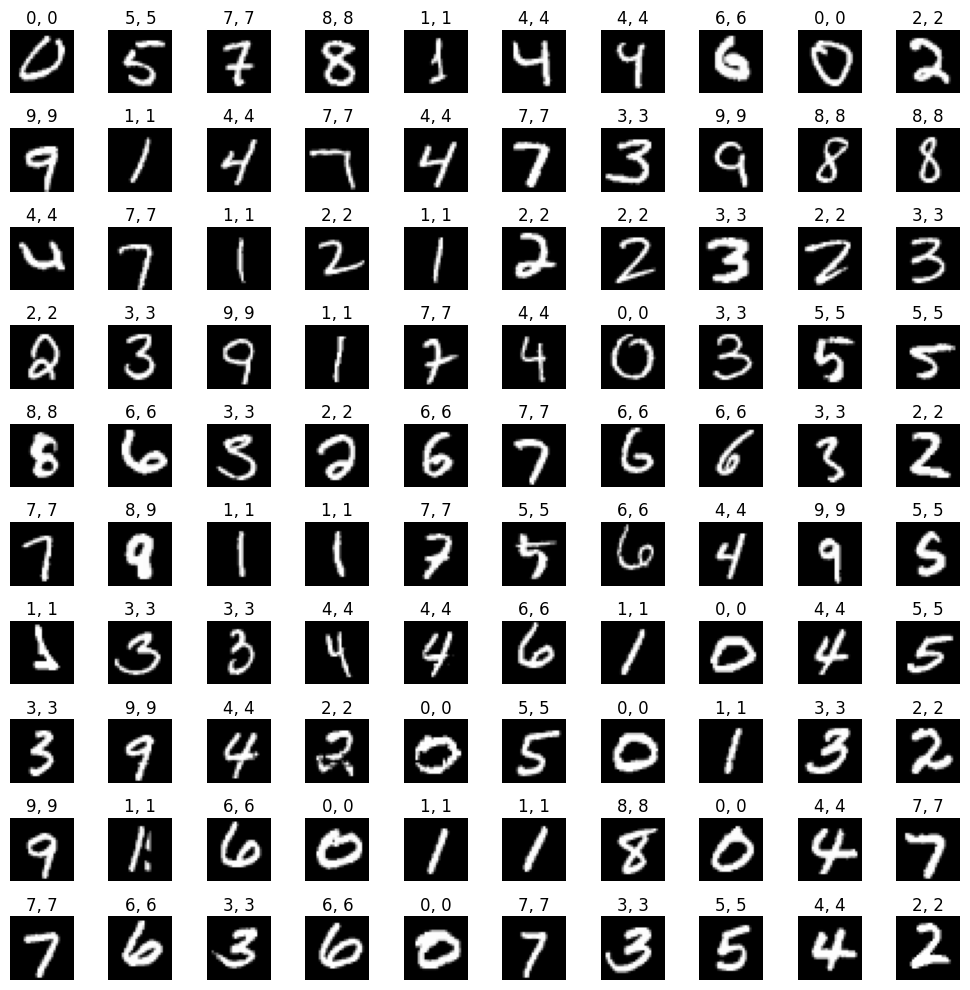

In [20]:
visualize_prediction_results(model, test_loader)

### 3.5 Visualize the incorrect prediction results of the Dataset

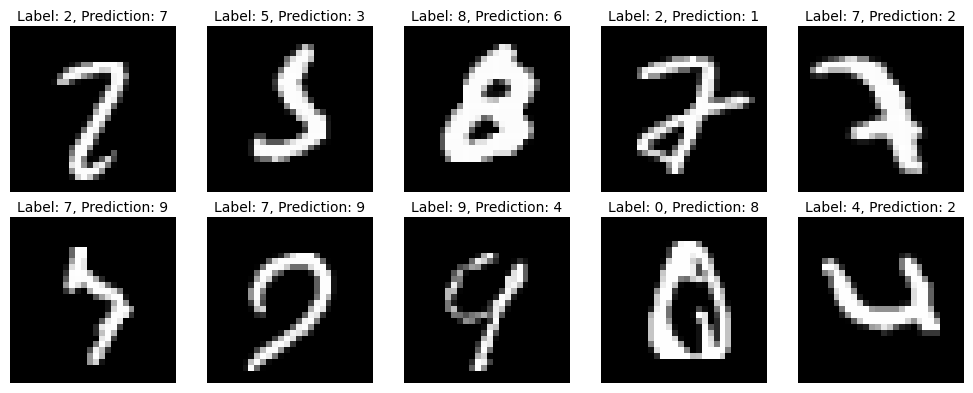

In [21]:
visualize_incorrect_predictions(model, test_loader)

## 4 - References

[MNIST Dataset](https://www.kaggle.com/datasets/hojjatk/mnist-dataset): The MNIST database of handwritten digits.